In [1]:
ls ../../data/omics/asso_met_atac/

chromState/                 fap.all23.ratio.atac.N.bed


In [2]:
import pandas as pd 

df = pd.read_csv( '../../data/omics/asso_met_atac/chromState/fap.chrall23.ratio.E075_18_core_K27ac_hg38lift_dense.10_EnhA2.atac.N.bed', header=0, sep="\t" )
df

,name,score,qValue(-log10),peak,chr,start,stop,N:A001_C021,N:A002_C121,N:A002_C212,...,N:A014_C115,N:A014_C202,N:A015_C008,N:A055_C111,N:A055_C211,T:A001_C007,CHR,start2,stop2,chrState
0,Peak_103702,1000,153.03862,600,chr1,100440204,100440206,7.69,3.57,5.36,...,5.26,5.88,4.44,3.70,0.00,3.03,chr1,100439844,100440444,10_EnhA2
1,Peak_103702,1000,153.03862,600,chr1,100440409,100440411,13.04,9.30,6.82,...,10.26,12.50,17.74,15.00,19.61,3.70,chr1,100439844,100440444,10_EnhA2
2,Peak_24248,1000,909.79266,285,chr1,100440204,100440206,7.69,3.57,5.36,...,5.26,5.88,4.44,3.70,0.00,3.03,chr1,100439844,100440444,10_EnhA2
3,Peak_24248,1000,909.79266,285,chr1,100440409,100440411,13.04,9.30,6.82,...,10.26,12.50,17.74,15.00,19.61,3.70,chr1,100439844,100440444,10_EnhA2
4,Peak_163928,545,52.61214,118,chr1,100531119,100531121,56.25,55.71,45.83,...,41.67,31.71,39.53,53.06,50.00,55.17,chr1,100529444,100531644,10_EnhA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315681,Peak_167824,513,49.40406,100,chr9,99907590,99907592,24.00,27.03,36.67,...,30.43,33.33,27.78,24.32,50.00,18.52,chr9,99907518,99907718,10_EnhA2
315682,Peak_20368,1000,1036.83118,1194,chr9,99907590,99907592,24.00,27.03,36.67,...,30.43,33.33,27.78,24.32,50.00,18.52,chr9,99907518,99907718,10_EnhA2
315683,Peak_208251,271,25.31115,1617,chr9,99907590,99907592,24.00,27.03,36.67,...,30.43,33.33,27.78,24.32,50.00,18.52,chr9,99907518,99907718,10_EnhA2
315684,Peak_21225,1000,1007.21161,979,chr9,99907590,99907592,24.00,27.03,36.67,...,30.43,33.33,27.78,24.32,50.00,18.52,chr9,99907518,99907718,10_EnhA2


In [3]:
df.loc[:,['name','score','qValue(-log10)','peak']].drop_duplicates()['qValue(-log10)'].mean()

339.3873385027849

In [4]:
df.loc[:,df.columns.str.contains('N:')].mean(axis=1).mean()

45.907696290724154

In [5]:
chromState=['1_TssA','2_TssFlnk','3_TssFlnkU','4_TssFlnkD','5_Tx','6_TxWk','7_EnhG1','9_EnhA1','10_EnhA2','8_EnhG2',
'11_EnhWk','12_ZNF_Rpts','13_Het'] #,'18_Quies']

color_chromState= [
 'rgb( 255,0,0)', # 1 Active TSS 
 'rgb( 255,69,0)', #  2 Flanking TSS 
 'rgb( 255,69,0)', #  3 Flanking TSS Upstream 
 'rgb( 255,69,0)', #  4 Flanking TSS Downstream 
 'rgb( 0,128,0)', #  5 Strong transcription 
 'rgb( 0,100,0)', #  6 Weak transcription 
 'rgb( 194,225,5)', #  7 Genic enhancer1 
 'rgb( 255,195,77)', #  9 Active Enhancer 1 
 'rgb( 255,195,77)', #  10 Active Enhancer 2 
 'rgb( 194,225,5)', #  8 Genic enhancer2 
 'rgb( 255,255,0)', #  11 Weak Enhancer 
 'rgb( 102,205,170)', #  12 ZNF genes & repeats 
 'rgb( 138,145,208)', #  13 Heterochromatin 
]



In [6]:
import numpy as np

arr_sum = np.empty([0,3])
arr_sum

array([], shape=(0, 3), dtype=float64)

In [7]:
for s in chromState : 
    f = "../../data/omics/asso_met_atac/chromState/fap.chrall23.ratio.E075_18_core_K27ac_hg38lift_dense.{}.atac.N.bed".format(s)
    #print (f)
    df = pd.read_csv( f, header=0, sep="\t" )
    met = df.loc[:,df.columns.str.contains('N:')].mean(axis=1).mean()
    atac = df.loc[:,['name','score','qValue(-log10)','peak']].drop_duplicates()['qValue(-log10)'].mean()
    print (s, df.shape[0], np.log(df.shape[0]), met, atac)
    print ( [met, atac, df.shape[0]] )
    arr_sum = np.append(arr_sum, [[met, atac, df.shape[0]]], axis=0 )
    
    

1_TssA 3404731 15.04067649297654 4.020239078875404 616.4768930175815
[4.020239078875404, 616.4768930175815, 3404731]
2_TssFlnk 798547 13.590549105268181 7.547525646267369 537.4599776070352
[7.547525646267369, 537.4599776070352, 798547]
3_TssFlnkU 1123659 13.932100882623596 8.636441976088845 581.6378850513034
[8.636441976088845, 581.6378850513034, 1123659]
4_TssFlnkD 366856 12.812724679467026 11.856839300865909 478.0923430362367
[11.856839300865909, 478.0923430362367, 366856]
5_Tx 60730 11.014193088891622 78.59462218905271 106.52008678782755
[78.59462218905271, 106.52008678782755, 60730]
6_TxWk 212362 12.266047644622745 56.35794084385092 186.46835236825203
[56.35794084385092, 186.46835236825203, 212362]
7_EnhG1 33932 10.432113800927626 60.70434437468889 231.2758664840881
[60.70434437468889, 231.2758664840881, 33932]
9_EnhA1 182096 12.11228929952167 44.694051906150534 388.469031843957
[44.694051906150534, 388.469031843957, 182096]
10_EnhA2 315686 12.662503327664771 45.907696290724154 339

In [8]:
arr_sum

array([[4.02023908e+00, 6.16476893e+02, 3.40473100e+06],
       [7.54752565e+00, 5.37459978e+02, 7.98547000e+05],
       [8.63644198e+00, 5.81637885e+02, 1.12365900e+06],
       [1.18568393e+01, 4.78092343e+02, 3.66856000e+05],
       [7.85946222e+01, 1.06520087e+02, 6.07300000e+04],
       [5.63579408e+01, 1.86468352e+02, 2.12362000e+05],
       [6.07043444e+01, 2.31275866e+02, 3.39320000e+04],
       [4.46940519e+01, 3.88469032e+02, 1.82096000e+05],
       [4.59076963e+01, 3.39387339e+02, 3.15686000e+05],
       [4.74415154e+01, 3.93464575e+02, 2.23150000e+04],
       [4.49790858e+01, 2.61514648e+02, 1.55849000e+05],
       [4.66880931e+01, 1.56614150e+02, 9.16100000e+03],
       [5.58738904e+01, 1.14350053e+02, 5.37400000e+03]])

In [9]:
df = pd.DataFrame(arr_sum, columns = ['met','atac','size'], index= chromState)
df

,met,atac,size
1_TssA,4.020239,616.476893,3404731.0
2_TssFlnk,7.547526,537.459978,798547.0
3_TssFlnkU,8.636442,581.637885,1123659.0
4_TssFlnkD,11.856839,478.092343,366856.0
5_Tx,78.594622,106.520087,60730.0
6_TxWk,56.357941,186.468352,212362.0
7_EnhG1,60.704344,231.275866,33932.0
9_EnhA1,44.694052,388.469032,182096.0
10_EnhA2,45.907696,339.387339,315686.0
8_EnhG2,47.441515,393.464575,22315.0


In [10]:
np.log(df['size'].to_list())

array([15.04067649, 13.59054911, 13.93210088, 12.81272468, 11.01419309,
       12.26604764, 10.4321138 , 12.1122893 , 12.66250333, 10.01301438,
       11.95664287,  9.12271062,  8.58932779])

In [11]:

df = pd.concat([df, pd.DataFrame(color_chromState, index=chromState, columns=['color'])], axis=1)
df_text = []
for index, row in df.iterrows() : 
    df_text.append( "{}<br>#CpG: {:,.0f}".format( index, row['size'] ) )

df['text'] = df_text
df

,met,atac,size,color,text
1_TssA,4.020239,616.476893,3404731.0,"rgb( 255,0,0)","1_TssA<br>#CpG: 3,404,731"
2_TssFlnk,7.547526,537.459978,798547.0,"rgb( 255,69,0)","2_TssFlnk<br>#CpG: 798,547"
3_TssFlnkU,8.636442,581.637885,1123659.0,"rgb( 255,69,0)","3_TssFlnkU<br>#CpG: 1,123,659"
4_TssFlnkD,11.856839,478.092343,366856.0,"rgb( 255,69,0)","4_TssFlnkD<br>#CpG: 366,856"
5_Tx,78.594622,106.520087,60730.0,"rgb( 0,128,0)","5_Tx<br>#CpG: 60,730"
6_TxWk,56.357941,186.468352,212362.0,"rgb( 0,100,0)","6_TxWk<br>#CpG: 212,362"
7_EnhG1,60.704344,231.275866,33932.0,"rgb( 194,225,5)","7_EnhG1<br>#CpG: 33,932"
9_EnhA1,44.694052,388.469032,182096.0,"rgb( 255,195,77)","9_EnhA1<br>#CpG: 182,096"
10_EnhA2,45.907696,339.387339,315686.0,"rgb( 255,195,77)","10_EnhA2<br>#CpG: 315,686"
8_EnhG2,47.441515,393.464575,22315.0,"rgb( 194,225,5)","8_EnhG2<br>#CpG: 22,315"


In [12]:
df_bubble = pd.DataFrame([[140,500,3000000],[140,500,1000000],[140,500,100000],[140,500,10000]], columns=['x','y','size'])
df_bubble

,x,y,size
0,140,500,3000000
1,140,500,1000000
2,140,500,100000
3,140,500,10000


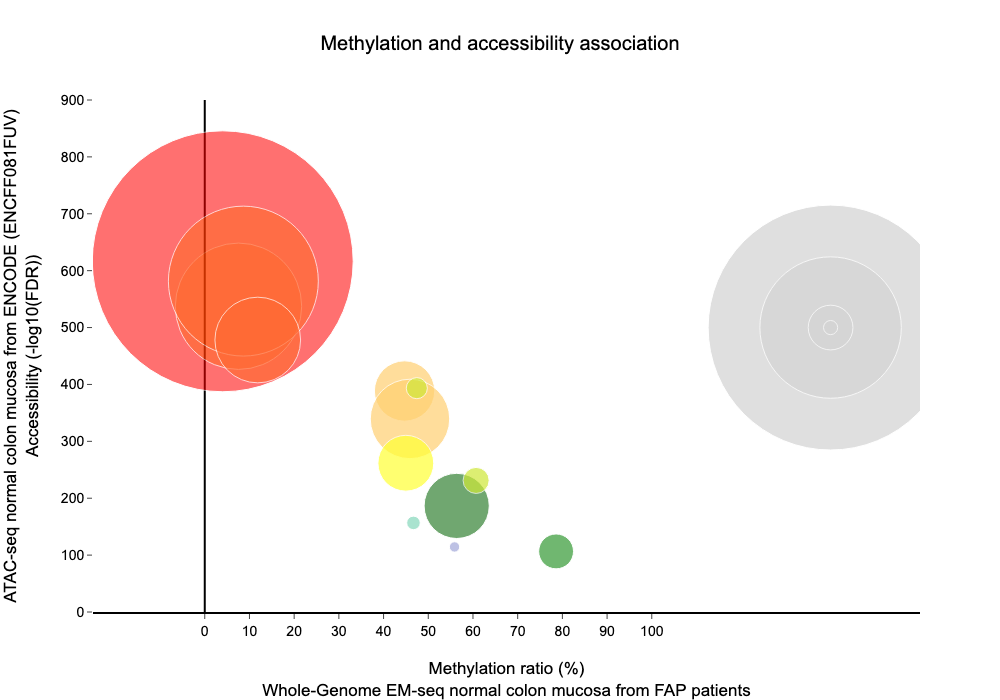

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

colorscale_met=[
                [1.0, "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0, "rgb(49,54,149)"]]

color_chromState= [
 'rgb( 255,0,0)', # 1 Active TSS 
 'rgb( 255,69,0)', #  2 Flanking TSS 
 'rgb( 255,69,0)', #  3 Flanking TSS Upstream 
 'rgb( 255,69,0)', #  4 Flanking TSS Downstream 
 'rgb( 0,128,0)', #  5 Strong transcription 
 'rgb( 0,100,0)', #  6 Weak transcription 
 'rgb( 194,225,5)', #  7 Genic enhancer1 
 'rgb( 255,195,77)', #  9 Active Enhancer 1 
 'rgb( 255,195,77)', #  10 Active Enhancer 2 
 'rgb( 194,225,5)', #  8 Genic enhancer2 
 'rgb( 255,255,0)', #  11 Weak Enhancer 
 'rgb( 102,205,170)', #  12 ZNF genes & repeats 
 'rgb( 138,145,208)', #  13 Heterochromatin 
 'rgb( 205,92,92)', #  14 Bivalent/Poised TSS 
 'rgb( 189,183,107)', #  15 Bivalent Enhancer 
 'rgb( 128,128,128)', #  16 Repressed PolyComb 
 'rgb( 192,192,192)', #  17 Weak Repressed PolyComb 
 'rgb( 255,255,255)' #  18 Quiescent/Low 
 ]

fig = go.Figure()
#fig = make_subplots(rows=1, cols=2, column_widths=[0.9, 0.1])

fig.add_trace( go.Scatter(
    x=df['met'],
    y=df['atac'],
    mode='markers',
    opacity=0.8,
    marker=dict(
        color=color_chromState,
        size=df['size']/100,
        sizemode='area',
        ),
    text = df['text']
    ), 
)

fig.add_trace( go.Scatter(
    x=df_bubble['x'],
    y=df_bubble['y'],
    mode='markers',
    opacity=0.8,
    marker=dict(
        color='rgb(200,200,200)',
        size=df_bubble['size']/100,
        sizemode='area',
        ),
    text = df_bubble['size']
    ), 
)


fig.update_layout(
    xaxis_title='Methylation ratio (%)'+'<br>'+'Whole-Genome EM-seq normal colon mucosa from FAP patients',
    yaxis_title='ATAC-seq normal colon mucosa from ENCODE (ENCFF081FUV)'+'<br>'+'Accessibility (-log10(FDR))',
    
    width=1000,
    height=700,
    font_family="Arial",
    title=dict(text="Methylation and accessibility association",
              xanchor='center', x=0.5,  
              ),
    titlefont=dict(size=20),
    font=dict(
        family="Arial, monospace",
        size=14,
        color="black"
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100],
        range=[-25,160]
    ),
    yaxis = dict(
        range=[0,900]
    ),
    legend=dict(
        bgcolor= "rgb(255, 255, 255)",
        bordercolor="Black",
        borderwidth=1,
        ),
    plot_bgcolor='rgb(255,255,255)',
    showlegend=False
)



fig.update_xaxes(showline=True, linecolor='black', mirror=False, linewidth=2, ticks='outside', zeroline=True, zerolinewidth=2, zerolinecolor='black')
fig.update_yaxes(showline=False, linecolor='black', mirror=True, linewidth=2, ticks='outside')


fig.write_image("fap_asso_met_atac_chromState_trend.pdf")
fig.write_image("fap_asso_met_atac_chromState_trend.png")

fig.show(renderer='png')


In [14]:
df['met']

1_TssA          4.020239
2_TssFlnk       7.547526
3_TssFlnkU      8.636442
4_TssFlnkD     11.856839
5_Tx           78.594622
6_TxWk         56.357941
7_EnhG1        60.704344
9_EnhA1        44.694052
10_EnhA2       45.907696
8_EnhG2        47.441515
11_EnhWk       44.979086
12_ZNF_Rpts    46.688093
13_Het         55.873890
Name: met, dtype: float64

In [15]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df['met'], df['atac'])
corr

-0.9142775410300252